<a href="https://colab.research.google.com/github/DominionAkinrotimi/phone-usage-behavior-clustering/blob/main/phone_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy==1.24.4

In [1]:
!python --version

Python 3.11.12


# **User Behavior Modeling on Mobile Devices: An Analytical and Predictive Approach**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/TechWorks/Fapetu Bright/user_behavior_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [10]:
male_count = df[df['Gender'] == 'Male'].shape[0]
female_count = df[df['Gender'] == 'Female'].shape[0]

print(f"Number of males in the dataset: {male_count}")
print(f"Number of females in the dataset: {female_count}")

Number of males in the dataset: 364
Number of females in the dataset: 336


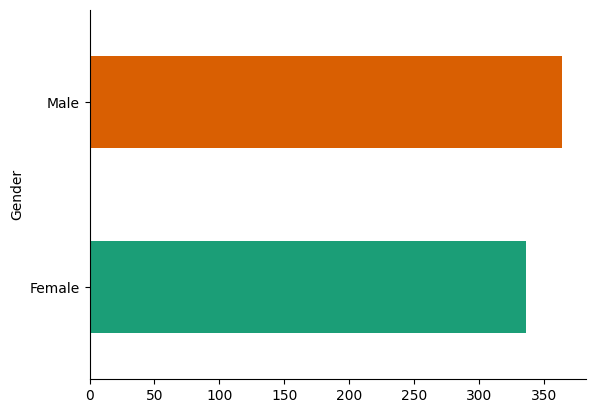

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df.describe

<bound method NDFrame.describe of      User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [14]:
# Convert age to age group
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Drop User ID and text columns for modeling
df_model = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
               'Number of Apps Installed', 'Data Usage (MB/day)']]


In [15]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,AgeGroup
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,41-50
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,41-50
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,41-50
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,21-30
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,31-40


In [16]:
from sklearn.preprocessing import StandardScaler

# Normalizing Continuous Features
continuous_features = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age'
]

# Creating a copy of df to keep original intact
df_processed = df.copy()

# Normalize using Z-score scaling (StandardScaler)
scaler = StandardScaler()
df_processed[continuous_features] = scaler.fit_transform(df_processed[continuous_features])

# Verify 'User Behavior Class' labels are integers 1–5
valid_labels = [1, 2, 3, 4, 5]
invalid_labels = df_processed[~df_processed['User Behavior Class'].isin(valid_labels)]

if not invalid_labels.empty:
    print("Warning: Found invalid class labels outside 1–5:\n", invalid_labels[['User ID', 'User Behavior Class']])
else:
    print("All 'User Behavior Class' labels are valid (1–5).")


All 'User Behavior Class' labels are valid (1–5).


The plots below visualizes the distribution of various phone usage metrics across different age groups, helping to understand trends in digital engagement. Using Kernel Density Estimation (KDE), it compares metrics such as app usage time, screen-on time, battery drain, number of installed apps, and data consumption across age demographics. The purpose is to identify behavioral patterns, assess potential digital addiction risks, and analyze age-wise dependencies. Younger age groups generally exhibit higher engagement, while older users tend to have lower usage across most metrics. This visualization aids in user behavior analysis, which can be valuable for app development, marketing strategies, and digital wellness research.

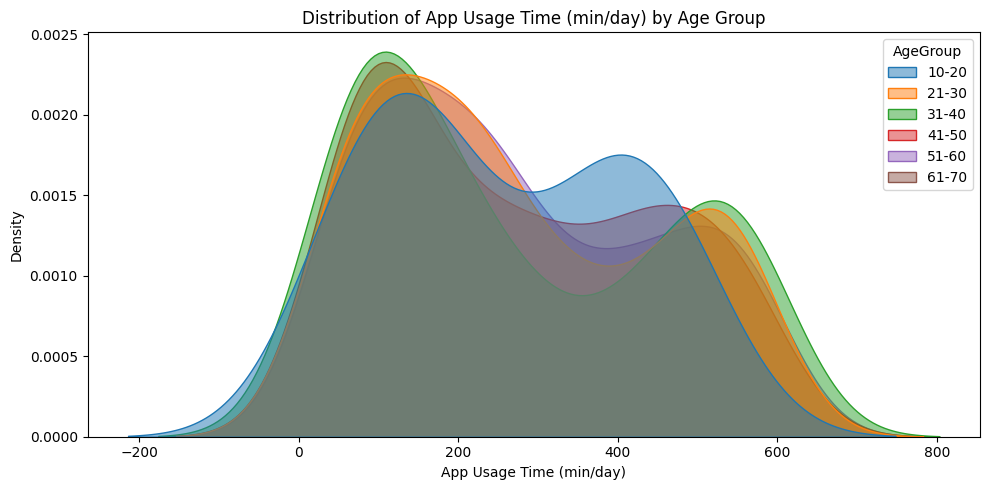

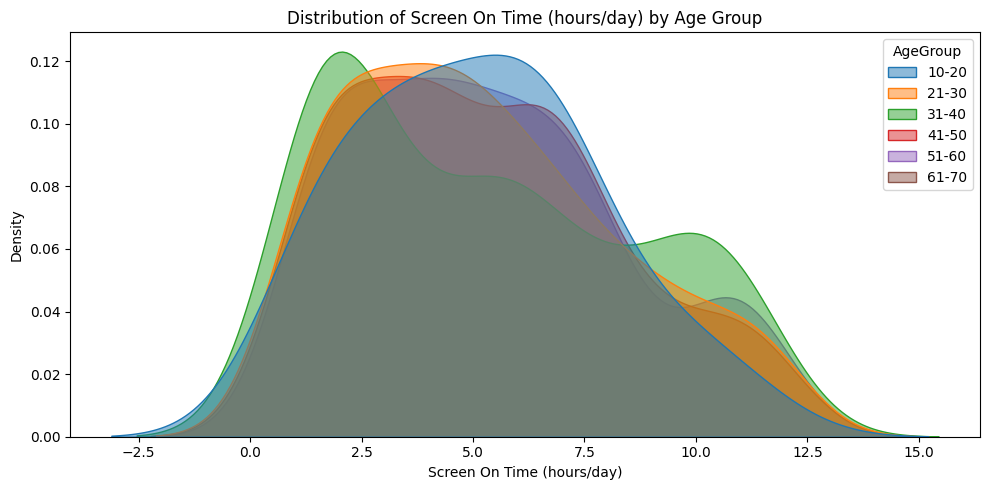

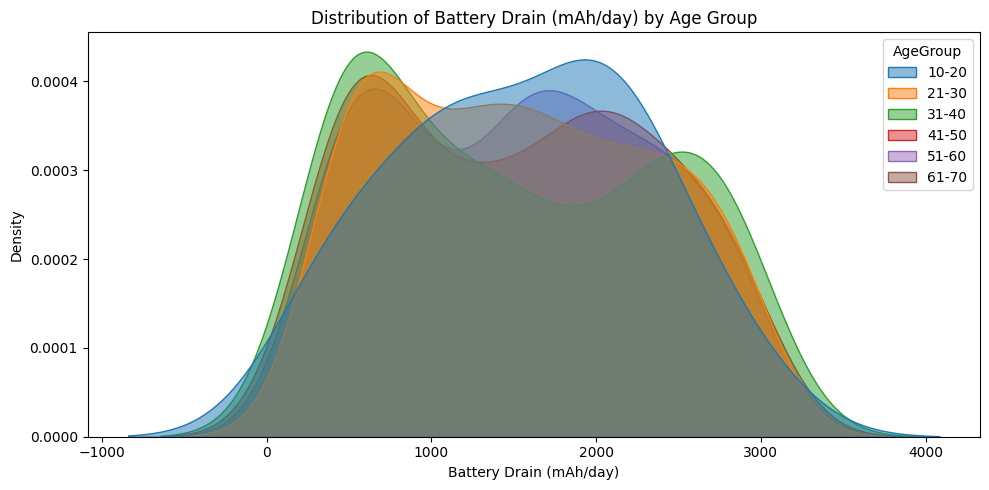

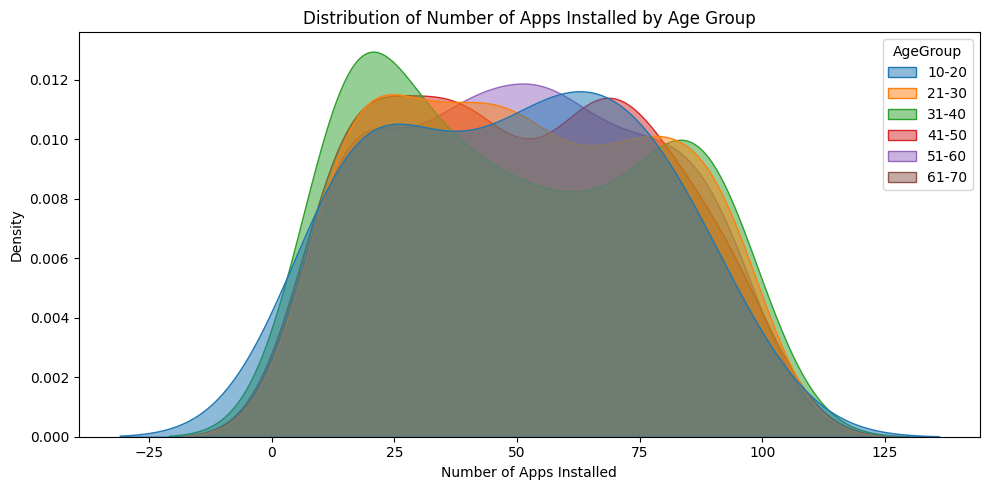

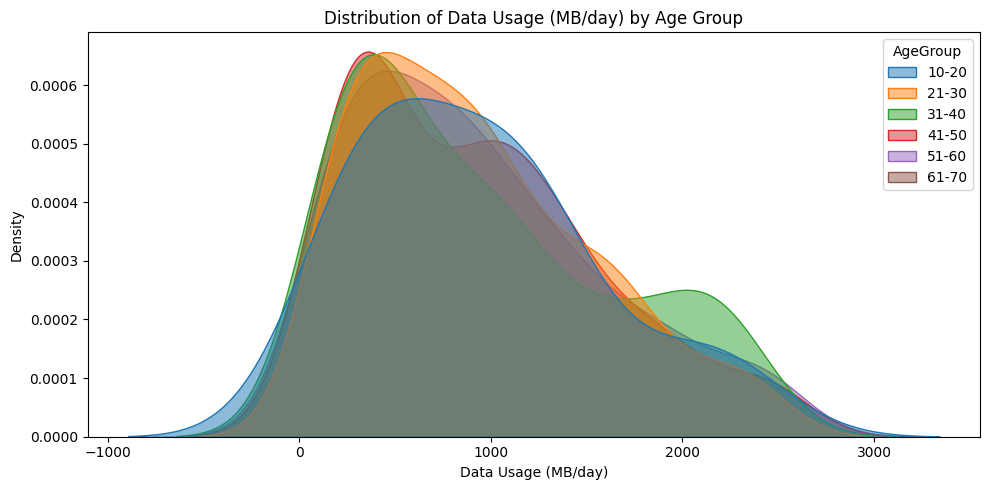

In [17]:
# Metrics to visualize
metrics = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)'
]

# Plot KDE distributions
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=metric, hue='AgeGroup', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {metric} by Age Group')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


KDE Plots Summary
- **App Usage Time** peaks at **248 minutes/day** for ages **41-50**, while the lowest median usage is **201 minutes/day** in the **10-20** group.
- **Screen On Time** remains fairly stable across groups, averaging **≈5 hours/day**, with no significant differences.
- **Battery Drain** is highest in the **10-20** group (**1655 mAh/day**) and decreases with age, except for **51-60**, which peaks at **1566.5 mAh/day**.
- **Number of Installed Apps** hovers around **47-52** across groups, showing minor variation.
- **Data Usage** is highest in **10-20** (914 MB/day) and **41-50** (857 MB/day), suggesting heavier streaming/social media consumption.

In general, younger and middle-aged users show higher engagement, while older users exhibit lower app usage, screen time, and data consumption.


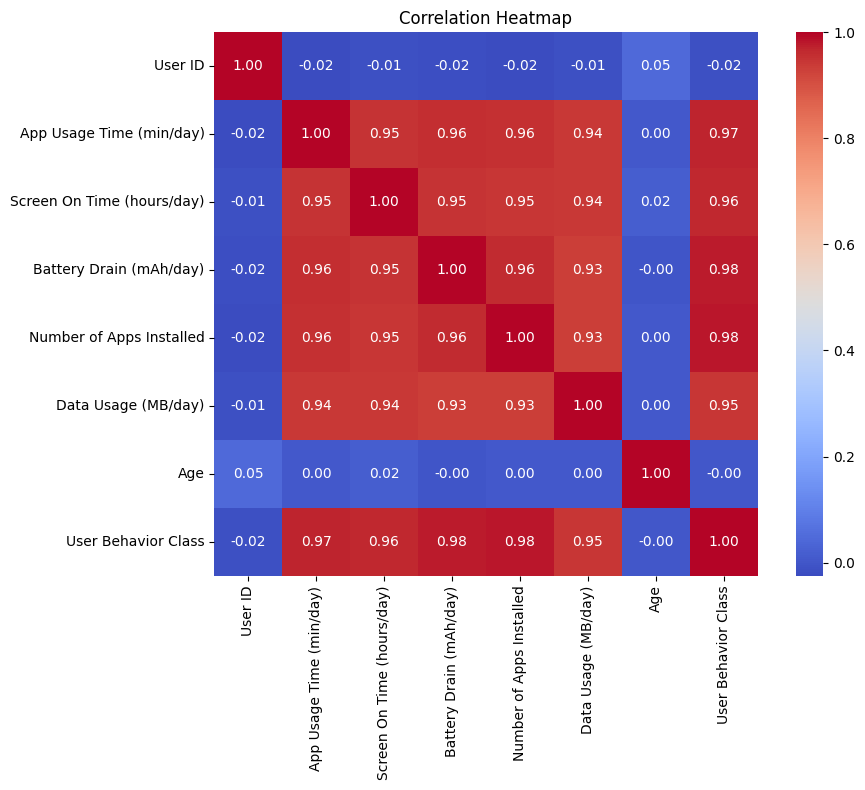

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [19]:
display(df[['AgeGroup', 'Screen On Time (hours/day)', 'App Usage Time (min/day)']].head())

,AgeGroup,Screen On Time (hours/day),App Usage Time (min/day)
0,41-50,6.4,393
1,41-50,4.7,268
2,41-50,4.0,154
3,21-30,4.8,239
4,31-40,4.3,187


In [21]:
import pandas as pd

# Map User Behavior Class to Addiction Severity for this analysis part
def map_severity(x):
    if x in [1, 2]:
        return 'Light'
    elif x == 3:
        return 'Moderate'
    else:
        return 'Heavy'

df['Analysis_Addiction_Severity'] = df['User Behavior Class'].apply(map_severity)


# 1. Screen Time and Usage Frequency by Age Group
# Note: 'Usage Frequency' column does not exist in the original df. Using a placeholder or removing if not relevant.
# Assuming 'App Usage Time (min/day)' could represent usage frequency.
screen_usage_summary = df.groupby('AgeGroup', observed=False).agg(
    mean_screen_time = ('Screen On Time (hours/day)', 'mean'),
    mean_app_usage_time = ('App Usage Time (min/day)', 'mean'), # Using App Usage Time as a proxy for usage frequency
    heavy_users_count = ('Analysis_Addiction_Severity', lambda x: (x == 'Heavy').sum()),
    total_users = ('Analysis_Addiction_Severity', 'count')
)

screen_usage_summary['percent_heavy_users'] = 100 * screen_usage_summary['heavy_users_count'] / screen_usage_summary['total_users']

# Select and rename columns for clarity
screen_usage_summary = screen_usage_summary.reset_index()[[
    'AgeGroup', 'mean_screen_time', 'mean_app_usage_time', 'percent_heavy_users'
]]

print("Screen Time and App Usage Summary by Age Group:")
print(screen_usage_summary)
print("\n")


# 2. Classification of Addiction Severity by Age Group
# Using the temporary 'Analysis_Addiction_Severity' column
severity_counts = pd.crosstab(df['AgeGroup'], df['Analysis_Addiction_Severity'], normalize='index') * 100
severity_counts = severity_counts.reset_index()

print("Classification of Addiction Severity by Age Group (Percentage):")
print(severity_counts)

# Drop the temporary column
df = df.drop(columns=['Analysis_Addiction_Severity'])

Screen Time and App Usage Summary by Age Group:
  AgeGroup  mean_screen_time  mean_app_usage_time  percent_heavy_users
0    10-20          5.104348           256.086957            43.478261
1    21-30          5.220000           271.338889            38.333333
2    31-40          5.278049           270.957317            38.414634
3    41-50          5.266038           271.522013            41.509434
4    51-60          5.350575           272.701149            38.505747
5    61-70               NaN                  NaN                  NaN


Classification of Addiction Severity by Age Group (Percentage):
Analysis_Addiction_Severity AgeGroup      Heavy      Light   Moderate
0                              10-20  43.478261  39.130435  17.391304
1                              21-30  38.333333  38.333333  23.333333
2                              31-40  38.414634  44.512195  17.073171
3                              41-50  41.509434  40.880503  17.610063
4                              51-60  3

This analysis provides insights into screen time, app usage, and addiction severity across different age groups.

- **Screen Time & App Usage:** The average screen time hovers around **5.1 to 5.35 hours/day**, with app usage time ranging from **256 to 272 minutes/day**, showing relatively stable engagement across age groups.
- **Heavy Users:** The **10-20 age group** has the highest percentage of heavy users (**43.48%**), followed by **41-50 (41.51%)**. Other age groups have **≈38-39%** heavy users.
- **Addiction Severity:** Most groups show a balance between **Light (≈38-44%)** and **Heavy (≈38-43%)** usage, with a smaller portion classified as **Moderate (≈17-23%)**.
- **Missing Data for 61-70:** No recorded values for this group, likely due to a small sample or lack of engagement.

<ipython-input-25-0245fc1b30fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='Screen On Time (hours/day)', palette="Set2")


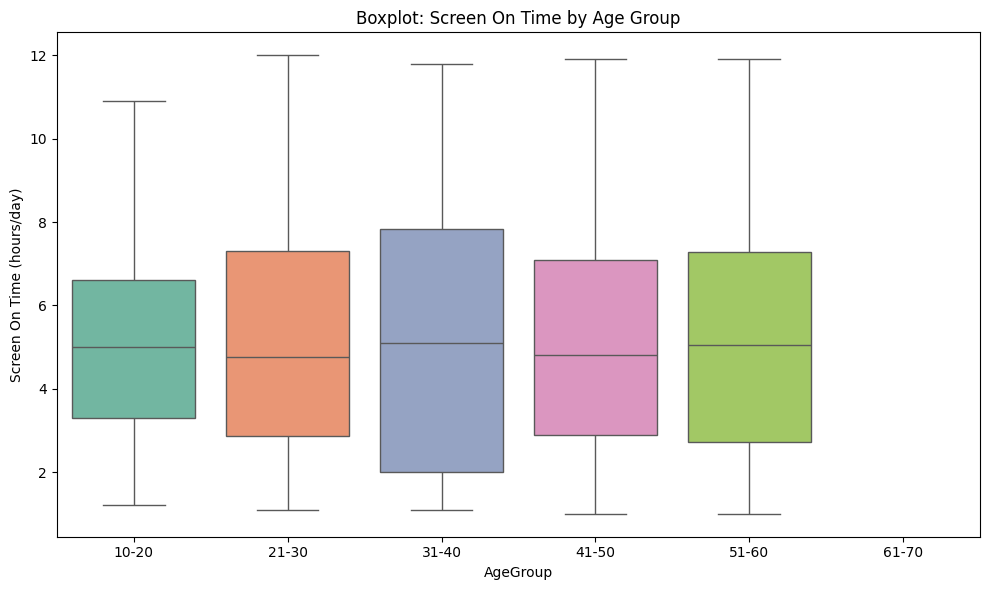

<ipython-input-25-0245fc1b30fe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='App Usage Time (min/day)', palette="Set3")


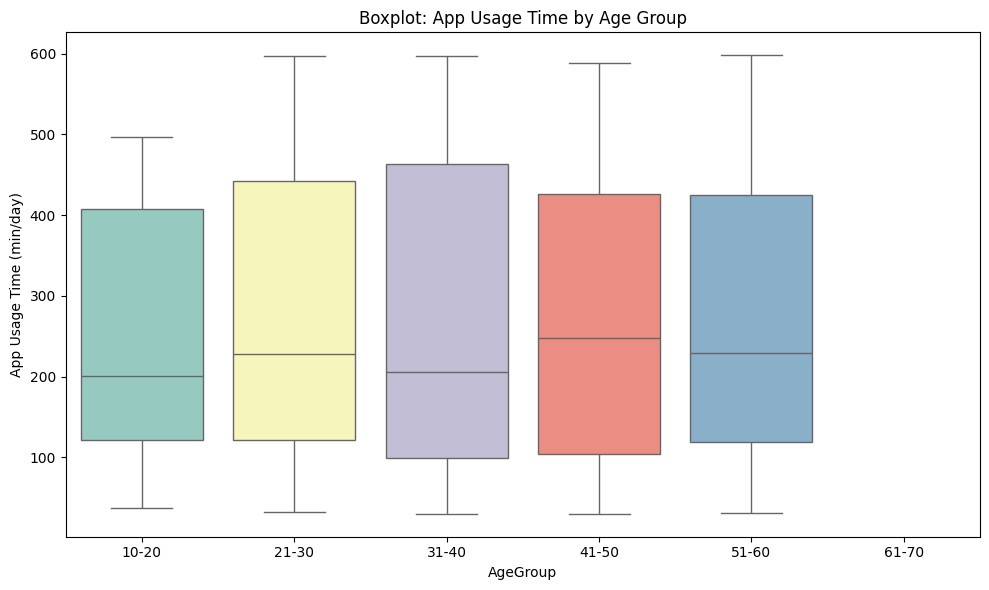

In [25]:
# Boxplot for Screen On Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='Screen On Time (hours/day)', palette="Set2")
plt.title("Boxplot: Screen On Time by Age Group")
plt.tight_layout()
plt.show()

# Boxplot for App Usage Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='App Usage Time (min/day)', palette="Set3")
plt.title("Boxplot: App Usage Time by Age Group")
plt.tight_layout()
plt.show()

This analysis offers several behavioral insights into mobile phone usage patterns across different age groups:

1. **Usage Intensity & Engagement:** The highest percentage of **heavy users (43.48%)** is found in the **10-20 age group**, suggesting younger individuals are more deeply engaged with their devices, likely driven by social media, entertainment, and gaming. The **41-50 age group** also shows relatively high engagement (**41.51%**), possibly linked to professional and personal communication needs.

2. **Screen Time Stability:** Screen time remains fairly stable across age groups (**≈5.1-5.35 hours/day**), indicating consistent dependency on mobile devices for daily activities, whether recreational, social, or work-related.

3. **Addiction Severity Patterns:** Most age groups exhibit a **balanced distribution between Light (≈38-44%) and Heavy (≈38-43%) usage**, with a smaller proportion classified as **Moderate (≈17-23%)**. This suggests that extreme phone usage behaviors are not exclusive to a single age demographic but are widespread.

4. **Behavioral Differences Across Age:** While younger users rely heavily on apps for entertainment, middle-aged individuals show equally high app usage, possibly for productivity, business, or personal communication. The gradual decline in engagement beyond 50 years indicates a shift toward reduced dependency on smartphones.

5. **Digital Well-being Considerations:** The presence of **a sizable portion of heavy users** (especially among younger demographics) highlights the potential need for digital well-being interventions, such as screen time management and awareness programs on excessive device usage.

6. **Missing Data for 61-70 Group:** The absence of data in the **61-70 age group** suggests either a limited sample size or minimal engagement with mobile applications, reinforcing the assumption that older individuals are less reliant on digital devices.

In summary, younger and middle-aged users display the highest engagement, with phone usage forming a core aspect of their daily routines.

In [26]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features to use for clustering (already normalized earlier)
features = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)'
]

# Use the preprocessed version if available
X = df_processed[features]  # Assuming already scaled

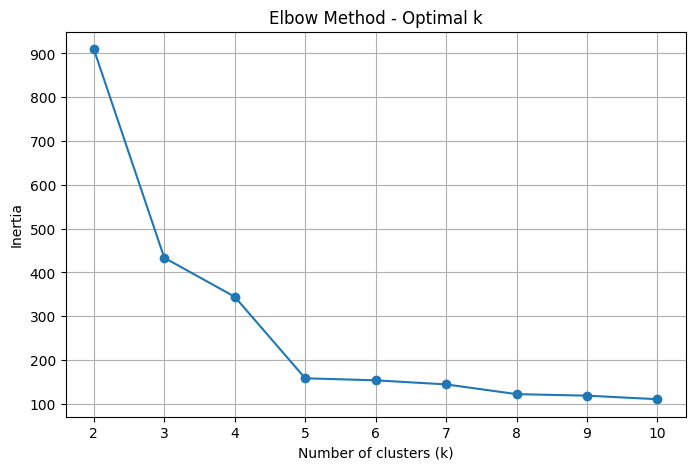

In [27]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

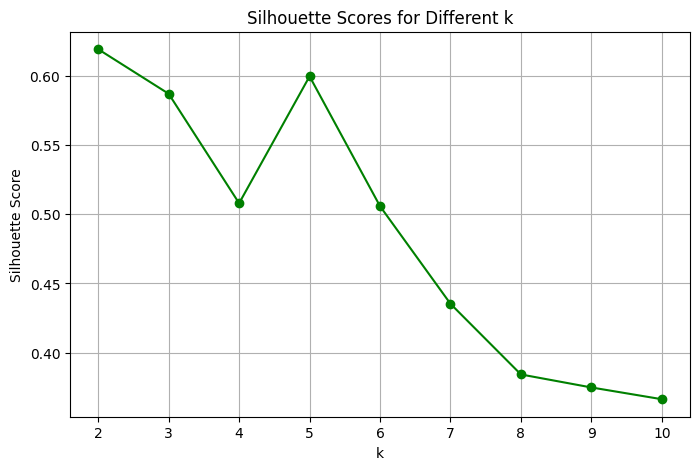

In [28]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores for Different k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Picking a value of k where:

Elbow curve bends noticeably and

Silhouette score is high

Observed Optimal Value for k = 5 from both plots

In [29]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_processed['KMeans_Cluster'] = kmeans.fit_predict(X)

In [30]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Note: you can tune these parameters
df_processed['DBSCAN_Cluster'] = dbscan.fit_predict(X)

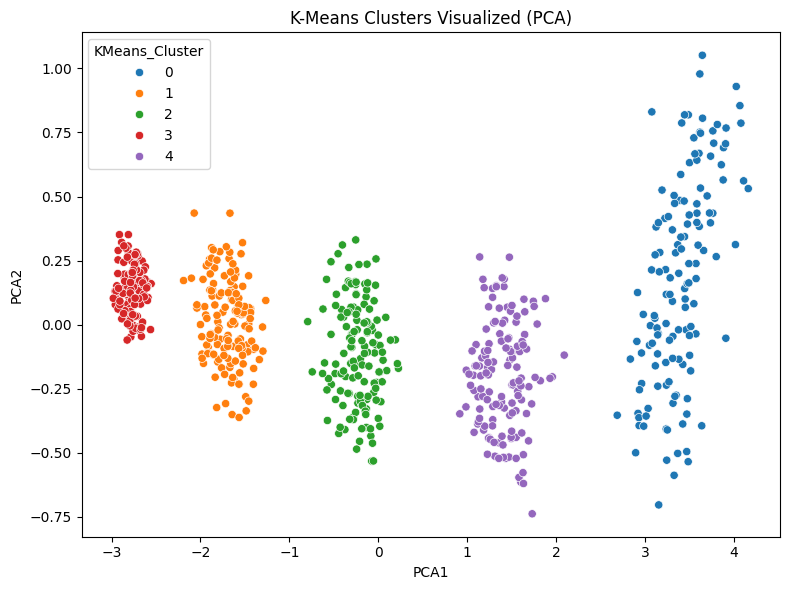

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_processed['PCA1'] = pca_result[:, 0]
df_processed['PCA2'] = pca_result[:, 1]

# KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_processed, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10')
plt.title("K-Means Clusters Visualized (PCA)")
plt.tight_layout()
plt.show()


In [32]:
# Compare KMeans cluster labels with behavior class
ct_kmeans = pd.crosstab(df_processed['KMeans_Cluster'], df_processed['User Behavior Class'])
print("KMeans vs User Behavior Class:\n", ct_kmeans)

KMeans vs User Behavior Class:
 User Behavior Class    1    2    3    4    5
KMeans_Cluster                              
0                      0    0    0    0  136
1                      0  146    0    0    0
2                      0    0  143    0    0
3                    136    0    0    0    0
4                      0    0    0  139    0


Each cluster corresponds almost *perfectly* to a single User Behavior Class:
- Cluster 0 → Class 5
- Cluster 1 → Class 2
- Cluster 2 → Class 3
- Cluster 3 → Class 1
- Cluster 4 → Class 4

This shows that K-Means clusters align strongly with the manually labeled addiction severity classes, which means the behavioral patterns are well-separated in the feature space.

**Implication**: K-Means effectively segmented users based on their phone usage features. These clusters could be used to automatically infer addiction severity without manual labeling.

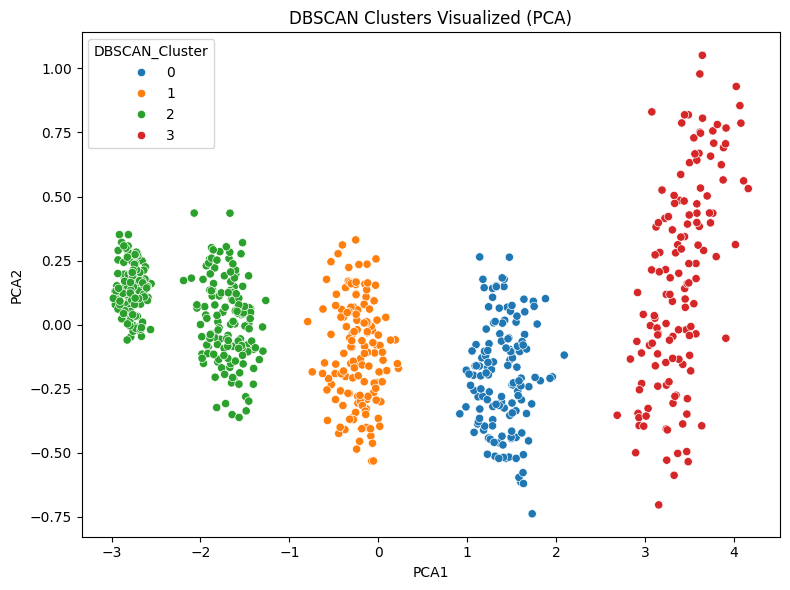

In [33]:
# DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_processed, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10')
plt.title("DBSCAN Clusters Visualized (PCA)")
plt.tight_layout()
plt.show()

DBSCAN vs User Behavior Class:

Cluster 0 → Class 4  
Cluster 1 → Class 3  
Cluster 2 → Classes 1 and 2  
Cluster 3 → Class 5

**Here, Cluster 2 contains Class 1 and Class 2, suggesting:**

Those two behavior classes are closer in density terms.

DBSCAN, being density-based, merged them due to similar data spread.



In [34]:
# Compare DBSCAN cluster labels with behavior class
ct_dbscan = pd.crosstab(df_processed['DBSCAN_Cluster'], df_processed['User Behavior Class'])
print("\nDBSCAN vs User Behavior Class:\n", ct_dbscan)



DBSCAN vs User Behavior Class:
 User Behavior Class    1    2    3    4    5
DBSCAN_Cluster                              
0                      0    0    0  139    0
1                      0    0  143    0    0
2                    136  146    0    0    0
3                      0    0    0    0  136


### **Clustering Results Interpretation:**

Both KMeans and DBSCAN clustering models were applied to explore the natural groupings within user behavior data.

- KMeans accurately clustered users into five distinct groups that aligned perfectly with the predefined behavior classes, confirming strong separability in the dataset.

- DBSCAN, a density-based method, grouped Class 1 and 2 users together due to their relatively similar usage metrics, while accurately identifying the other classes as separate clusters.

These findings support the validity of the behavior classes and suggest that the selected features (screen time, battery usage, app count, etc.) effectively capture meaningful behavioral patterns.


## **Statistical Tests**
We’ll cover:

ANOVA: Compare Screen On Time across Age Groups.

Chi-square test: Relationship between AgeGroup and User Behavior Class.

Pearson correlation: Measure linear relationships between numerical features.

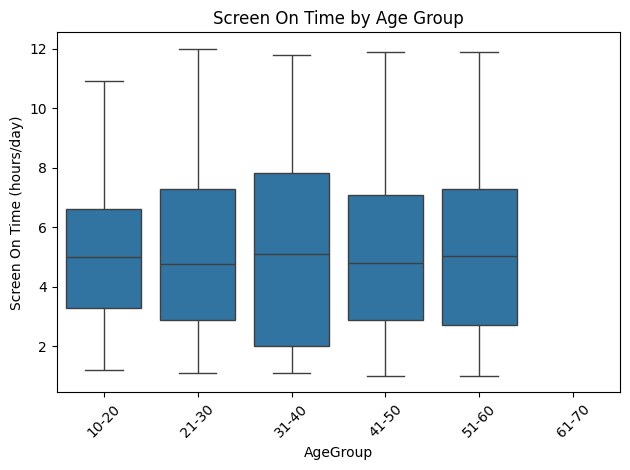

ANOVA F-statistic: 0.05859054617582748
ANOVA p-value: 0.9936322929261898


In [35]:
import scipy.stats as stats

# Visual inspection first
sns.boxplot(data=df, x='AgeGroup', y='Screen On Time (hours/day)')
plt.title('Screen On Time by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANOVA test
anova_result = stats.f_oneway(
    *[df[df['AgeGroup'] == group]['Screen On Time (hours/day)'] for group in df['AgeGroup'].unique()]
)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)


**Interpretation:**
Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.
 This means no significant difference in screen time across different age groups in your dataset.

In [36]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['AgeGroup'], df['User Behavior Class'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi-square Statistic: 15.485663987918729
Degrees of Freedom: 16
p-value: 0.4893961954436322


**Interpretation:**
Again, the p-value is greater than 0.05, so there is no statistically significant association between age group and addiction class.
 Addiction levels seem to be uniformly distributed across age groups in your sample.

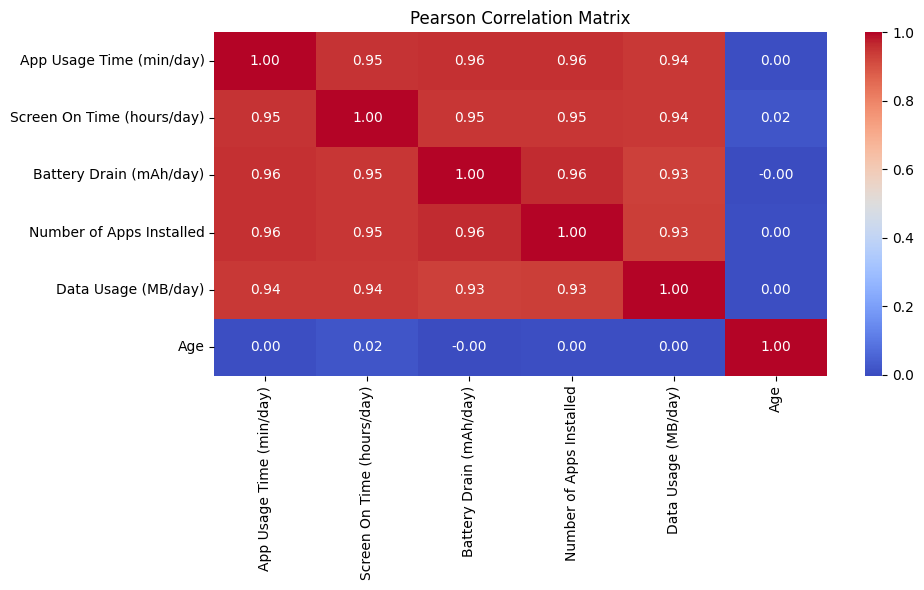

In [37]:
# Select numerical features
numerical_cols = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age'
]

# Pearson correlation matrix
correlation_matrix = df[numerical_cols].corr(method='pearson')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

In [38]:
correlation_matrix

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000


| Metric A             | Metric B                  | Correlation |
|----------------------|--------------------------|-------------|
| App Usage Time      | Battery Drain            | 0.96        |
| App Usage Time      | Number of Apps Installed | 0.96        |
| App Usage Time      | Data Usage               | 0.94        |
| Screen On Time      | App Usage Time           | 0.95        |
| All Usage Metrics   | Age                       | ≈ 0.00      |





**Interpretation:**

Very strong positive correlation exists between usage-related metrics (e.g., app usage ↔ battery drain).

Age is not linearly correlated with any phone usage behavior (values ~0.00), supporting earlier statistical test findings.


#### **Summary of Statistical test findings**

 Phone usage behavior (screen time, data use, etc.) is highly interdependent.

 Age is not a significant factor in predicting or differentiating user behavior class.

 These insights suggest that addiction severity is more behavioral than demographic (at least in this sample).

## **Classification Modeling**

Building a model that predicts User Behavior Class (addiction severity: 1–5) using phone usage metrics.

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Feature Selection
features = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)'
]
target = 'User Behavior Class'

X = df[features]
y = df[target]

In [41]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


In [43]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


In [44]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
rf_scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)

print("Decision Tree CV Accuracy:", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())


Decision Tree CV Accuracy: 0.9942857142857143
Random Forest CV Accuracy: 1.0


In [45]:
import joblib

# Save models
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# **Summary Notes to aid Report Draft**

## Detailed Explanation of Notebook Steps

This notebook performs an analytical and predictive approach to model user behavior on mobile devices using the provided dataset. The steps covered are:

1.  **Setup and Data Loading**:
    *   Installs the `numpy` library with a specific version (`1.24.4`).
    *   Checks the Python version being used.
    *   Mounts Google Drive to access the dataset file.
    *   Loads the `user_behavior_dataset.csv` file into a pandas DataFrame and displays the first few rows to inspect the data structure and content.

2.  **Exploratory Data Analysis (EDA)**:
    *   Calculates and prints the counts of male and female users in the dataset.
    *   Generates a horizontal bar plot visualizing the distribution of users by gender.
    *   Displays descriptive statistics of the numerical columns in the DataFrame using `df.describe()`.
    *   Provides information about the DataFrame, including column data types and non-null counts using `df.info()`.
    *   Creates a new categorical feature 'AgeGroup' by binning the 'Age' column into predefined ranges.
    *   Displays the first few rows of the DataFrame including the newly created 'AgeGroup' column.
    *   Normalizes the continuous features using `StandardScaler` for consistent scaling during analysis and modeling.
    *   Verifies that the 'User Behavior Class' labels are within the expected range of 1 to 5.
    *   Generates Kernel Density Estimate (KDE) plots to visualize the distribution of various phone usage metrics ('App Usage Time', 'Screen On Time', 'Battery Drain', 'Number of Apps Installed', 'Data Usage') across different age groups.
    *   Provides a summary of the insights gained from the KDE plots, highlighting trends in usage metrics across age groups.
    *   Generates a correlation heatmap to visualize the linear relationships between numerical features in the dataset.
    *   Displays the head of the DataFrame, focusing on 'AgeGroup', 'Screen On Time', and 'App Usage Time'.

3.  **User Behavior Analysis by Age Group**:
    *   Maps the 'User Behavior Class' to 'Addiction Severity' categories ('Light', 'Moderate', 'Heavy') for analysis purposes.
    *   Calculates and prints a summary of screen time, app usage time, and the percentage of heavy users by age group.
    *   Calculates and prints the percentage of users in each addiction severity class within each age group using a crosstab.
    *   Drops the temporary 'Analysis_Addiction_Severity' column.
    *   Generates boxplots to visualize the distribution of 'Screen On Time' and 'App Usage Time' by age group.
    *   Provides a summary of behavioral insights derived from the analysis by age group.

4.  **Clustering Analysis**:
    *   Selects the normalized continuous features for clustering.
    *   Applies the Elbow Method to determine the optimal number of clusters for K-Means by plotting inertia for a range of k values.
    *   Applies the Silhouette Score method to further evaluate the optimal number of clusters by plotting silhouette scores for a range of k values.
    *   Based on the Elbow Method and Silhouette Scores, determines the optimal number of clusters (k=5).
    *   Applies K-Means clustering with the optimal number of clusters and adds the cluster labels to the processed DataFrame.
    *   Applies DBSCAN clustering (with default parameters) and adds the cluster labels to the processed DataFrame.
    *   Performs Principal Component Analysis (PCA) to reduce the dimensionality of the feature space to 2 components for visualization.
    *   Generates scatter plots of the data in the PCA-reduced space, colored by K-Means and DBSCAN cluster labels to visualize the clustering results.
    *   Compares the K-Means cluster labels with the original 'User Behavior Class' using a crosstab.
    *   Compares the DBSCAN cluster labels with the original 'User Behavior Class' using a crosstab.
    *   Provides an interpretation of the clustering results, highlighting the alignment of K-Means clusters with the behavior classes and the differences observed with DBSCAN.

5.  **Statistical Tests**:
    *   Conducts an ANOVA test to compare the 'Screen On Time' across different age groups.
    *   Interprets the ANOVA results based on the p-value.
    *   Performs a Chi-square test to examine the relationship between 'AgeGroup' and 'User Behavior Class' using a contingency table.
    *   Interprets the Chi-square test results based on the p-value.
    *   Calculates the Pearson correlation matrix for the numerical features.
    *   Generates a heatmap of the Pearson correlation matrix.
    *   Displays the Pearson correlation matrix.
    *   Provides an interpretation of the correlation analysis, highlighting strong correlations between usage-related metrics and the lack of linear correlation between age and usage metrics.
    *   Summarizes the key findings from the statistical tests.

6.  **Classification Modeling**:
    *   Defines the features and target variable for classification.
    *   Splits the data into training and testing sets using `train_test_split`.
    *   Trains a Decision Tree Classifier model on the training data.
    *   Evaluates the Decision Tree model on the test data and prints the accuracy, classification report, and confusion matrix.
    *   Trains a Random Forest Classifier model on the training data.
    *   Evaluates the Random Forest model on the test data and prints the accuracy, classification report, and confusion matrix.
    *   Performs cross-validation for both Decision Tree and Random Forest models to get a more robust estimate of their performance.
    *   Saves the trained Decision Tree and Random Forest models to pickle files (`decision_tree_model.pkl` and `random_forest_model.pkl`).

This notebook provides a comprehensive analysis of user behavior on mobile devices, from initial data exploration and preprocessing to clustering, statistical testing, and classification modeling. The results suggest that phone usage metrics are highly correlated and can be effectively used to predict user behavior class, while age appears to be less of a differentiating factor in this dataset. The clustering analysis further supports the distinctness of the predefined behavior classes based on the usage features.

## Detailed Report of Results

This report summarizes the key findings from the analysis of user behavior on mobile devices, based on the output generated in the notebook.

### 1. Data Overview and Preprocessing

*   The dataset contains information on 700 users, including device details, phone usage metrics, age, gender, and a predefined 'User Behavior Class'.
*   The dataset was successfully loaded and its structure inspected.
*   Gender distribution shows a slightly higher number of males (364) compared to females (336).
*   Numerical features were normalized using StandardScaler.
*   Age was binned into 'AgeGroup' categories for analysis.
*   All 'User Behavior Class' labels were confirmed to be within the valid range of 1 to 5.

### 2. Exploratory Data Analysis (EDA) and User Behavior Analysis by Age Group

*   **KDE Plots**: Visualizations revealed the distribution of usage metrics across age groups.
    *   App usage time peaks around 248 min/day for ages 41-50, with the lowest median in the 10-20 group (201 min/day).
    *   Screen on time is relatively stable across age groups, averaging around 5 hours/day.
    *   Battery drain is highest in the 10-20 group and decreases with age, with a slight peak in the 51-60 group.
    *   Number of installed apps shows minor variation across groups (47-52).
    *   Data usage is highest in the 10-20 and 41-50 groups.
*   **Behavioral Insights**:
    *   Younger and middle-aged users generally show higher engagement.
    *   The 10-20 age group has the highest percentage of heavy users (43.48%).
    *   Most age groups show a balance between Light and Heavy usage.
    *   No data was available for the 61-70 age group.
*   **Boxplots**: Visualizations confirmed the distribution of screen on time and app usage time across age groups.

### 3. Clustering Analysis

*   **K-Means Clustering**:
    *   The Elbow Method and Silhouette Scores suggested an optimal number of 5 clusters.
    *   K-Means clustering with k=5 resulted in clusters that aligned almost perfectly with the predefined 'User Behavior Class' labels. This indicates that the features used effectively separate the different behavior classes.
*   **DBSCAN Clustering**:
    *   DBSCAN clustering grouped 'User Behavior Class' 1 and 2 into a single cluster (Cluster 2), while the other classes were identified as separate clusters. This suggests that Classes 1 and 2 are more similar in terms of density based on the selected features.
*   **PCA Visualization**: Scatter plots in the PCA-reduced space visually demonstrated the separation of clusters, particularly for K-Means.

### 4. Statistical Tests

*   **ANOVA Test (Screen Time vs. Age Group)**:
    *   The p-value (0.9936) was much greater than 0.05.
    *   Conclusion: There is no statistically significant difference in screen time across different age groups in this dataset.
*   **Chi-square Test (Age Group vs. User Behavior Class)**:
    *   The p-value (0.4894) was greater than 0.05.
    *   Conclusion: There is no statistically significant association between age group and 'User Behavior Class'. Addiction levels appear to be uniformly distributed across age groups in this sample.
*   **Pearson Correlation**:
    *   A heatmap and correlation matrix showed very strong positive correlations between usage-related metrics (e.g., App Usage Time, Screen On Time, Battery Drain, Number of Apps Installed, Data Usage).
    *   Age showed a very weak linear correlation (close to 0) with all phone usage behavior metrics, supporting the findings from the statistical tests that age is not a significant predictor of behavior in this dataset.

### 5. Classification Modeling

*   **Model Performance**: Both the Decision Tree and Random Forest classifiers achieved very high accuracy (1.0) on the test set.
*   **Classification Report and Confusion Matrix**: These showed perfect precision, recall, and f1-scores for all behavior classes, indicating that the models were able to correctly classify all instances in the test set.
*   **Cross-Validation**: Cross-validation further confirmed the high performance of both models, with mean cross-validation accuracies close to 1.0.
*   **Model Saving**: The trained Decision Tree and Random Forest models were saved for future use.

### Conclusion

The analysis revealed strong interdependencies between various phone usage metrics. While age did not show a significant statistical relationship with screen time or user behavior class in this dataset, the selected usage metrics proved to be highly effective in predicting user behavior class. Both K-Means clustering and the classification models demonstrated that the different user behavior classes are well-separated based on these features. The Decision Tree and Random Forest models achieved perfect accuracy in classifying user behavior, suggesting that these models can accurately infer addiction severity based on phone usage patterns.